Importing the necessary libraries

In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [22]:
import pandas as pd
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [24]:
boston_df=pd.read_csv(boston_url)

## Descriptive Statistics and Visualizations

Boxplot for the Median value of owner-occupied homes variable

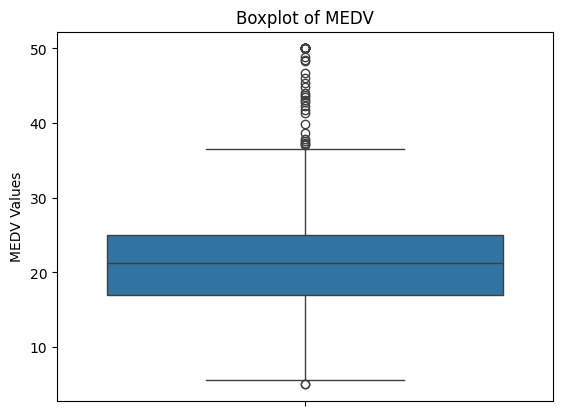

In [ ]:
sns.boxplot(y=boston_df['MEDV'])

pyplot.ylabel("MEDV Values")
pyplot.title("Boxplot of MEDV")

pyplot.show()

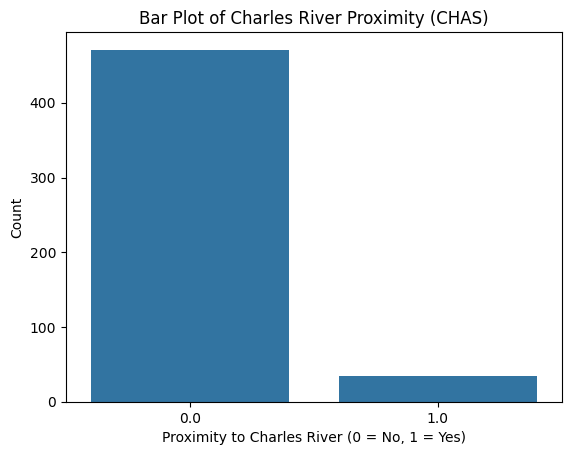

In [ ]:
# Barplot for the Charles river variable
sns.countplot(x=boston_df['CHAS'])

pyplot.xlabel("Proximity to Charles River (0 = No, 1 = Yes)")
pyplot.ylabel("Count")
pyplot.title("Bar Plot of Charles River Proximity (CHAS)")

pyplot.show()

Boxplot for the Median value of owner-occupied homes variable vs the Proportion of owner-occupied units built prior to 1940 variable

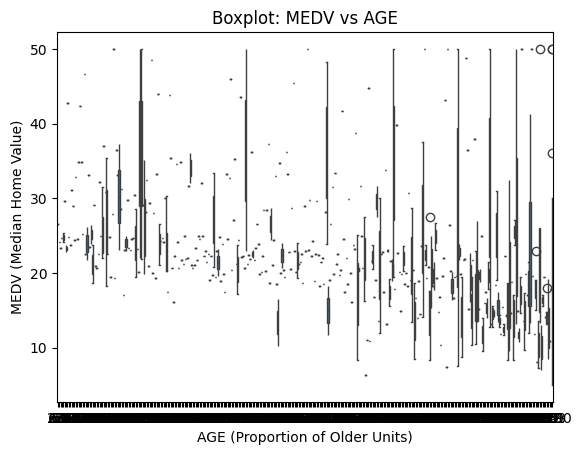

In [ ]:
sns.boxplot(x=boston_df['AGE'], y=boston_df['MEDV'])

pyplot.xlabel("AGE (Proportion of Older Units)")
pyplot.ylabel("MEDV (Median Home Value)")
pyplot.title("Boxplot: MEDV vs AGE")

pyplot.show()

Scatter plot showing the relationship between Nitric oxide concentrations and the Proportion of owner-occupied units built prior to 1940 variable

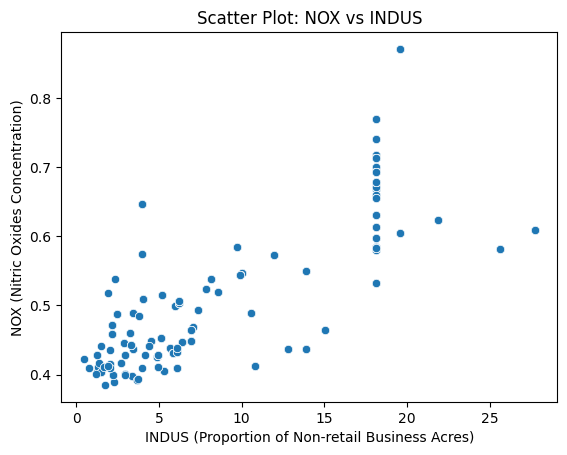

In [ ]:
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])

pyplot.xlabel("INDUS (Proportion of Non-retail Business Acres)")
pyplot.ylabel("NOX (Nitric Oxides Concentration)")
pyplot.title("Scatter Plot: NOX vs INDUS")

pyplot.show()

The scatter plot suggests a positive relationship between the NOX (Nitric Oxides Concentration) and INDUS (Proportion of Non-retail Business Acres) variables.
One striking observation is that at higher INDUS values (around 18–20), the NOX levels appear consistently high, forming a cluster.
The points scattered lower on the INDUS axis indicate regions with less industrial activity, where NOX concentrations seem to remain relatively moderate.

Histogram for the Pupil-teacher ratio by town

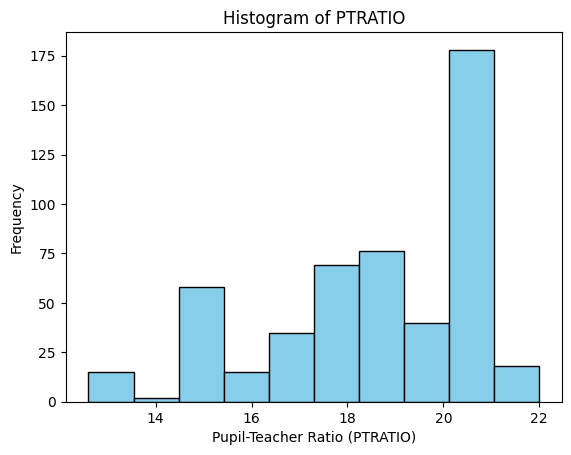

In [ ]:
pyplot.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')

pyplot.xlabel("Pupil-Teacher Ratio (PTRATIO)")
pyplot.ylabel("Frequency")
pyplot.title("Histogram of PTRATIO")

pyplot.show()

## Tests

Testing whether there is a significant difference in median value of houses bounded by the Charels river

In [ ]:
# H0: μ1 = μ2 and H1: μ1 ≠ μ2
# α = 0.05
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                boston_df[boston_df['CHAS'] == 0]['MEDV'])

TtestResult(statistic=np.float64(3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

Since this is a comparison of means, we should use the T-test for the independent samples.
Hence, we calculate the P-value and compare it with the Alpha (α). 
In our case, P-value < 0.05, therefore, we reject H0. 
Meaning, there is significant difference between the median value of the houses bounded by the Charles river and those that are not.

Calculating the impact of an additional weighted distance to the five Boston employment centers ont he mnedian alue of owner occcupied home

In [ ]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.21e-08
Time:                        17:56:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Therefore, the regression model can be summarized as follows:

MEDV = β0 + β1*DIS + ε

where:
β0 = 18.3091
β1 = 1.0916
ε = 0.188, which shows low variability

Also, the high t-statistics (5.795) indicates that the relationship is highly statistical significant and that the impact of DIS on MEDV is highly significant due to its p-value (0.000).

CONCLUSION: 
An increase of one unit in the weighted distance to the five Boston employment centers leads to an estimated increase of 1.0916 in the median value of owner-occupied homes, based on the regression analysis.
